# Online Retail

- http://archive.ics.uci.edu/ml/datasets/online+retail#


## Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


## Attribute Information:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric.	
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import itertools
import operator
import statsmodels.api as sm

In [5]:
online_retail = pd.read_excel('data/Online Retail.xlsx')

In [6]:
online_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
online_retail['InvoiceDate'] = online_retail['InvoiceDate'].astype('datetime64[ns]')
online_retail['TotalPrice'] = online_retail['Quantity'] * online_retail['UnitPrice']

In [9]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
TotalPrice     541909 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [11]:
(online_retail['CustomerID'].isnull()).any()

True

In [12]:
online_retail[online_retail['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,3.32
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,14.94
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,5.02
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.30
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,3.87
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,4.73


In [13]:
#calculate revenue? total sum of the price
online_retail.set_index('InvoiceDate', inplace=True)

In [14]:
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
y = online_retail['TotalPrice'].resample('D').sum()

In [15]:
y.head()

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04         NaN
2010-12-05    31383.95
Freq: D, Name: TotalPrice, dtype: float64

In [16]:
y = y.fillna(y.bfill())

In [17]:
y.head()

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04    31383.95
2010-12-05    31383.95
Freq: D, Name: TotalPrice, dtype: float64

In [18]:
y.isnull().any()

False

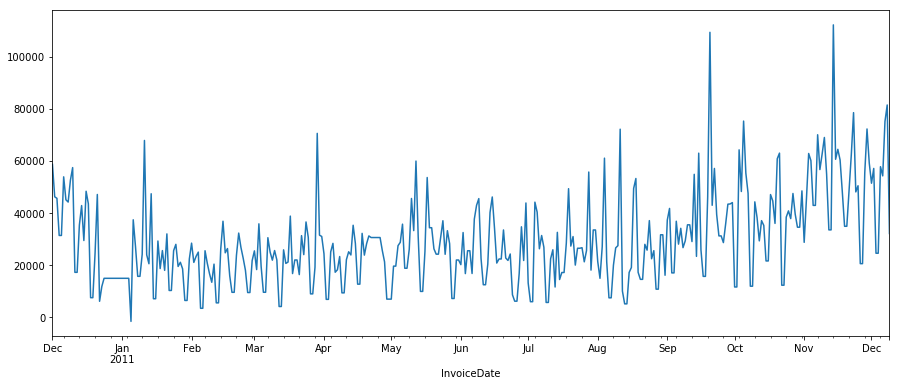

In [19]:
y.plot(figsize=(15,6))
plt.show()

In [20]:
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

# try adjust the `s` parameter
s = 1
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(p, d, q))]

In [21]:
print('Example of parameter conbination for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))

Example of parameter conbination for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 1)
SARIMAX: (0, 1, 0) x (0, 1, 0, 1)


In [22]:
warnings.filterwarnings('ignore')
history = {}
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            
            results = mod.fit()
            history[(param, param_seasonal)] = results.aic
            print('ARIMA{}x{} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 1) - AIC: 8607.222842705485
ARIMA(0, 0, 0)x(0, 1, 1, 1) - AIC: 8190.495335664507
ARIMA(0, 0, 0)x(1, 0, 0, 1) - AIC: 8319.929893920249
ARIMA(0, 0, 0)x(1, 0, 1, 1) - AIC: 8214.338314723327
ARIMA(0, 0, 0)x(1, 1, 0, 1) - AIC: 8297.863944904744
ARIMA(0, 0, 0)x(1, 1, 1, 1) - AIC: 8176.326156774695
ARIMA(0, 0, 1)x(0, 0, 0, 1) - AIC: 8607.222842705485
ARIMA(0, 0, 1)x(0, 0, 1, 1) - AIC: 8560.015455110955
ARIMA(0, 0, 1)x(0, 1, 0, 1) - AIC: 8190.495335664507
ARIMA(0, 0, 1)x(0, 1, 1, 1) - AIC: 8230.270566367511
ARIMA(0, 0, 1)x(1, 0, 0, 1) - AIC: 8487.92004862521
ARIMA(0, 0, 1)x(1, 0, 1, 1) - AIC: 8461.562980190225
ARIMA(0, 0, 1)x(1, 1, 0, 1) - AIC: 8179.52589675337
ARIMA(0, 0, 1)x(1, 1, 1, 1) - AIC: 8147.028727800335
ARIMA(0, 1, 0)x(0, 0, 1, 1) - AIC: 8190.495335664507
ARIMA(0, 1, 0)x(0, 1, 1, 1) - AIC: 8330.334452745741
ARIMA(0, 1, 0)x(1, 0, 0, 1) - AIC: 8297.863944904744
ARIMA(0, 1, 0)x(1, 0, 1, 1) - AIC: 8176.326156774695
ARIMA(0, 1, 0)x(1, 1, 0, 1) - AIC: 8525.29453660

Get the combination that results the minimum AIC

In [23]:
sorted_x = sorted(history.items(), key=operator.itemgetter(1))

In [24]:
param, param_seasonal =  sorted_x[0][0][0], sorted_x[0][0][1]

In [25]:
print(param)
print(param_seasonal)


(1, 0, 1)
(0, 1, 1, 1)


In [26]:
model = sm.tsa.statespace.SARIMAX(y,
                         order = param,
                         seasonal_order=param_seasonal,
                         enforce_stationarity=False,
                         enforce_invertibility=False)

results = model.fit()

In [27]:
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                        TotalPrice   No. Observations:                  374
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 1)   Log Likelihood               -4067.602
Date:                           Thu, 24 Aug 2017   AIC                           8143.204
Time:                                   22:47:38   BIC                           8158.901
Sample:                               12-01-2010   HQIC                          8149.436
                                    - 12-09-2011                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2766      0.185     -1.495      0.135      -0.639       0.086
ma.L1         -0.9059      0.028    -32.756

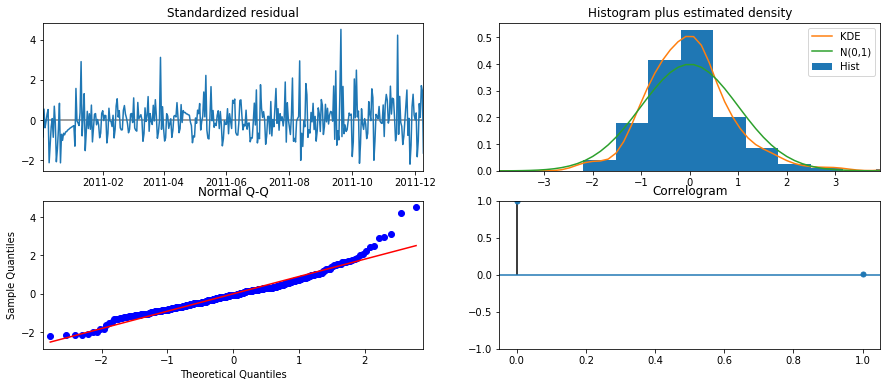

In [28]:
# http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.plot_diagnostics.html
results.plot_diagnostics(lags=1, figsize=(15,6))
plt.show()

## Validating Forecasts

- one-step ahead forecast
- dynamic forecast

### One-step ahead forecast

In [29]:
start_date = '2011-10-01'
pred = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)

In [30]:
pred_ci = pred.conf_int()

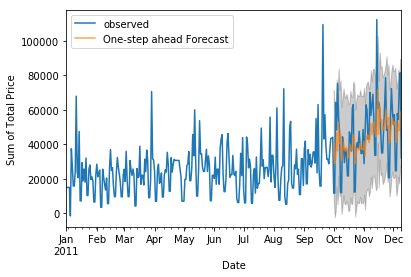

In [31]:
ax = y['2011':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Total Price')

plt.legend()

plt.show()

In [32]:
y_forecasted = pred.predicted_mean
y_truth = y[start_date:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of our forecasts is 325384348.46


### Dynamic forecast

In [33]:
pred_dynamic = results.get_prediction(start=pd.to_datetime(start_date), dynamic=True)

pred_dynamic_ci = pred_dynamic.conf_int()

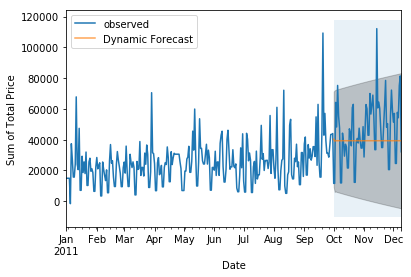

In [34]:
ax = y['2011':].plot(label='observed')

pred_dynamic.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.7)

ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k',
               alpha=.2)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(start_date), y.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Total Price')

plt.legend()

plt.show()

In [35]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y[start_date:]
mse = ((y_forecasted - y_truth) ** 2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 419196643.73


The one-step ahead results lower MSE than the dynamic.

## Visualizing Forecasts

In [36]:
pred_uc = results.get_forecast(steps=7)

pred_ci = pred_uc.conf_int()

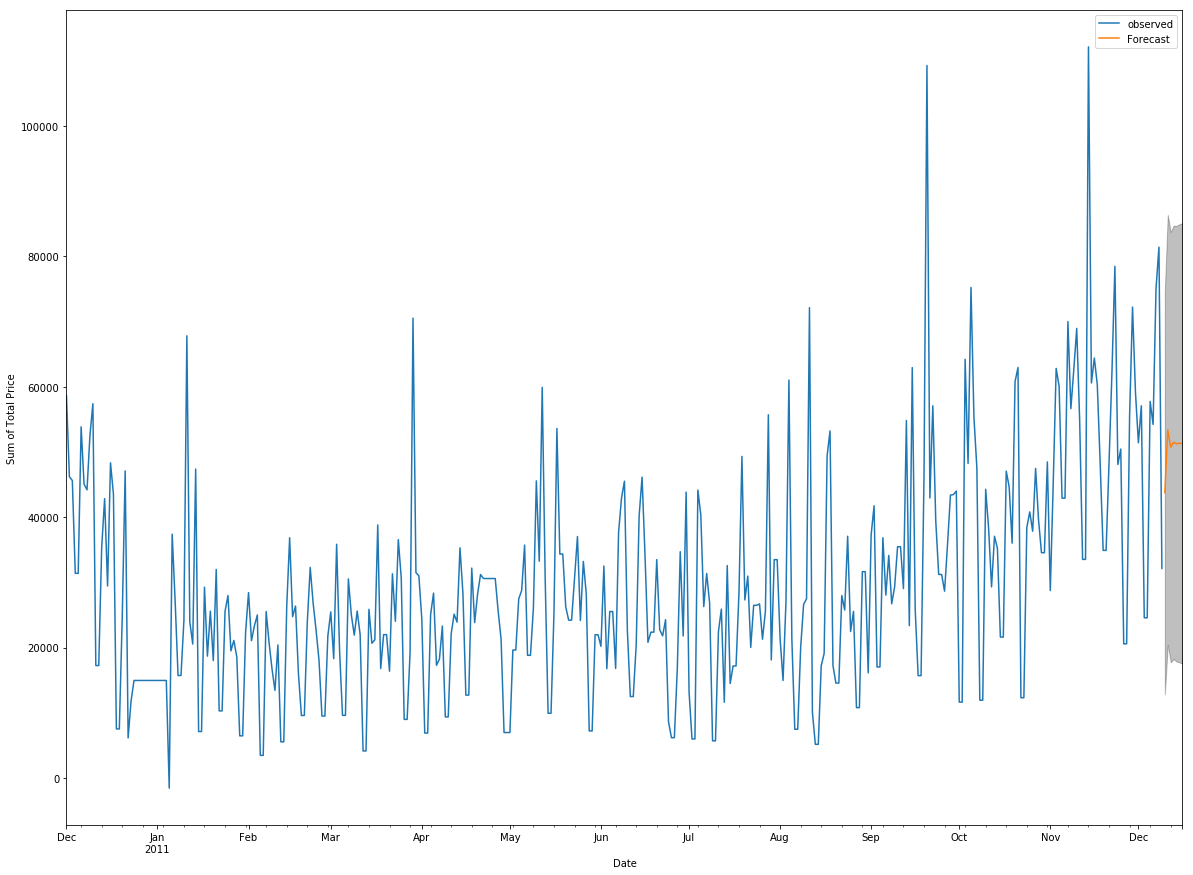

In [37]:
ax = y.plot(label='observed', figsize=(20,15))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color='k',
               alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Total Price')

plt.legend()
plt.show()